<a href="https://colab.research.google.com/github/jacqueszhg/aaa_loan_approval/blob/main/AAA_Esteban_Jacques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet AAA
Notre projet porte sur un dataset traitant le sujet du prêt bancaire.

Réalisé par :
- GOMEZ Esteban
- ZHENG Jacques

# Project et Dataset description
## But du projet
Le but du projet est de déterminer, **si un prêt bancaire est accordé ou non à un client**. Grâce au information connu du client dans le dataset.

## Solutions existantes
D'autres personnes ont déjà utilisé ce dataset pour réaliser des entrainements. Voici la liste des contributeur dont les solutions sont en ligne et accessible : [solutions existantes](https://www.kaggle.com/datasets/laotse/credit-risk-dataset/code)

## Dataset original source
Lien orignal de notre dataset: [Credit Risk](https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data)

# Tout les imports du projet

In [1]:
# Python ≥3.5 is required
import sys  # Utilisé pour vérifier la version de Python
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn  # Vérification de la version de Scikit-Learn
assert sklearn.__version__ >= "0.20"

import seaborn as sns

# Common imports
import os  # Opérations sur le système de fichiers
import pandas as pd  # Gestion de données tabulaires
from scipy import stats

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc, make_scorer

from numpy import ndarray

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Instruction d'access aux données

Le dataset téléchargé que nous utilisons dans ce projet peut-être retrouvé sur le lien suivant [credit_risk.csv](https://github.com/jacqueszhg/aaa_loan_approval/blob/main/credit_risk_dataset.csv)

## Code pour charger le dataset

In [2]:
csv_url="https://raw.githubusercontent.com/jacqueszhg/aaa_loan_approval/refs/heads/main/credit_risk_dataset.csv"
data = pd.read_csv(csv_url)
target_name = "loan_status"
init_data = data

# Dataset Exploratory Analysis

## Metadata
Commençons par analyser le nombres d'instances, de features et les types des données de notre dataset.

In [3]:
print("Nombre d'instances :", data.shape[0])

Nombre d'instances : 32581


In [4]:
# Nombres de features et les types des features
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


On voit que le dataset est constitué de 11 features :
- 7 : numérique
- 4 : non numérique/catégoriel

Les noms des features et leur type nous fournis assez intuitivement la valeur qu'elle peuvent prendre et leur signification :

| Colonne                        | Description                                         | Type         |
|--------------------------------|-----------------------------------------------------|--------------|
| person_age                     | Âge de la personne                                 | Float        |
| person_income                  | Revenu annuel                                      | Float        |
| person_home_ownership          | Statut de propriété du logement (par ex., location, propriétaire, hypothèque) | Categorical  |
| person_emp_length              | Durée d'emploi (en années)                         | Integer      |
| loan_intent                    | But du prêt                                        | Categorical  |
| loan_grade                     | Classe du prêt (notation attribuée à la qualité du prêt) | Categorical  |
| loan_amnt                      | Montant du prêt demandé                            | Float        |
| loan_int_rate                  | Taux d'intérêt du prêt                             | Float        |
| loan_status                    | Statut d'approbation du prêt : 1 = approuvé ; 0 = rejeté    | Integer      |
| loan_percent_income            | Montant du prêt en pourcentage du revenu annuel    | Float        |
| cb_person_default_on_file      | Défauts historiques sur le crédit                  | Categorical  |
| cb_preson_cred_hist_length     | Longueur de l'historique de crédit                 | Float        |

In [5]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = data.select_dtypes(include=['object']).columns.tolist()

print(numerical_columns)
print(non_numerical_columns)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


## Nb nulls/na

Avec les information obtenu avec `.info()`, on remarque que pour certaine features ils manquent des données, car chaque feature ne possède pas 32581 valeur `non-null`, mais on peut le vérifier avec le code suivant :

In [6]:
print("Valeur null par feature: \n\n", data.isnull().sum())

Valeur null par feature: 

 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


On constate qu'il y a `895` et `3116` valeurs `null`/`na`, respectivement pour `person_emp_length` et `loan_int_rate`.

On imagine que ces données sont manquant car elles non pas été collectées ou qu'il y a eu des erreurs lors des saisies des données ou lors de l'export du csv.

Pour choisir notre stratégie pour faire face à ces données manquant :
- Stratégie 1 : Supprimer les lignes ou colonnes avec trop de valeurs manquantes.
- Stratégie 2 : Imputer des valeurs manquantes avec des moyennes ou médianes

Nous voulons d'abord observer à quoi ressemble les données dans le dataset.

In [7]:
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


Après visualisation des données la stratégie que nous allons appliquer est la suivantes :
- Toutes les instances où la valeur `person_emp_length` est null nous allons la supprimer, car nous ne pouvons pas inventer le nombre d'année de travail d'une personne.
  - De plus la suppression de ces lignes ne réduira pas trop la taille du dataset, car cela ne représente que 895 lignes sur les 32581 initiaux.


In [8]:
old_nb_instance = data.shape[0]
print("Nombre d'instance avant suppression : ",old_nb_instance)
data = data.dropna(subset=['person_emp_length'])
print("Nombre d'instance après suppression : ", data.shape[0])
print("Supression de 895 instance : ", 895 == old_nb_instance - data.shape[0])

Nombre d'instance avant suppression :  32581
Nombre d'instance après suppression :  31686
Supression de 895 instance :  True


- Pour les instances où seulement `loan_int_rate` est null nous allons la remplir avec la valeur mediane du groupe du `loan_grade` auquel il appartient.
  - On choisi la médiane car elle est moins influencée par les valeurs extrêmes ou aberrantes que la moyenne.
  - On rempli les valeurs nulles dans `loan_int_rate` en fonction de la médiane des valeurs de `loan_grade`, car ça permet de maintenir une certaine cohérence par rapport aux autres caractéristiques similaires.
  - Mais cette approche est valable si le `loan_int_rate` dépend fortement du groupe de prêt `loan_grade`. On va alors d'abord s'assurer que `loan_grade` est une variable qui segmente de manière significative les données sur `loan_int_rate`.

In [9]:
print(data.groupby('loan_grade')['loan_int_rate'].describe())

data_without_null_loan_int_rate = data.dropna(subset=['loan_int_rate'])

# Appliquer l'ANOVA pour tester si la moyenne de 'loan_int_rate' diffère significativement par 'loan_grade'
anova_result = stats.f_oneway(*(data_without_null_loan_int_rate[data_without_null_loan_int_rate['loan_grade'] == grade]['loan_int_rate'] for grade in data_without_null_loan_int_rate['loan_grade'].unique()))
print(f"ANOVA p-value: {anova_result.pvalue}")

# Calcul de la corrélation de Spearman
correlation = data_without_null_loan_int_rate['loan_int_rate'].corr(data_without_null_loan_int_rate['loan_grade'].astype('category').cat.codes, method='spearman')
print(f"Corrélation de Spearman : {correlation}")

             count       mean       std    min    25%     50%    75%    max
loan_grade                                                                 
A           9402.0   7.347094  1.041754   5.42   6.62   7.490   7.90   9.63
B           9151.0  11.002471  0.908672   6.00  10.36  10.990  11.71  12.69
C           5699.0  13.453041  0.960865   6.00  12.98  13.480  13.99  16.11
D           3248.0  15.348901  1.111142   6.00  14.61  15.310  16.00  18.49
E            870.0  17.005655  1.329259   6.00  16.32  16.795  17.93  20.69
F            209.0  18.597321  1.378610  15.01  18.09  18.530  19.41  22.06
G             59.0  20.251525  1.066830  17.34  19.82  20.160  20.88  23.22
ANOVA p-value: 0.0
Corrélation de Spearman : 0.9472708774845893


Résultats de l'ANOVA (Analyse de la variance)
- **p-value = 0.0** : Cette valeur p est inférieure à 0.05, ce qui indique que **`loan_grade` a un impact significatif sur `loan_int_rate`**.

Résultats de la corrélation de Spearman
- **Corrélation de Spearman = 0.947** : Une corrélation de 0.947 est extrêmement forte et positive, ce qui signifie qu'il existe une relation monotone très forte entre `loan_grade` (qui est ordonnée) et `loan_int_rate`.

Interprétation des statistiques descriptives, par groupe `loan_grade` :
- Les moyennes de `loan_int_rate` augmentent au fur et à mesure que `loan_grade` passe de "A" à "G".
  - Cela confirme qu'il y a une différence significative dans les taux d'intérêt des prêts en fonction du grade de prêt, ce qui est en ligne avec les résultats de l'ANOVA et de la corrélation.

Donc `loan_grade` est un facteur très important pour segmenter `loan_int_rate`. On va alors utiliser la stratégie décrite plus haut pour remplir les valeurs null de `loan_int_rate`.

In [10]:
# Calculer la médiane de 'loan_int_rate' pour chaque groupe 'loan_grade'
loan_int_rate_medians = data.groupby('loan_grade')['loan_int_rate'].median()

# Remplir les valeurs manquantes dans 'loan_int_rate' par la médiane du groupe correspondant
data['loan_int_rate'] = data.apply(
    lambda row: loan_int_rate_medians[row['loan_grade']] if pd.isna(row['loan_int_rate']) else row['loan_int_rate'],
    axis=1
)


print("Nombre d'instance (31686) : ", data.shape[0])
print("Valeur null par feature: \n\n", data.isnull().sum())

Nombre d'instance (31686) :  31686
Valeur null par feature: 

 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


<ipython-input-10-55885f1bee5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_int_rate'] = data.apply(


Vérifions s'il existe des lignes dupliquées, car nous ne voulons pas sur-entrainer le modèle sur des données identique.

In [11]:
# Afficher le nombre de doublons avant suppression
print(f'Duplicated values before removal: {data.duplicated().sum()}')

# Supprimer les doublons
data = data.drop_duplicates()

# Afficher le nombre de doublons après suppression
print(f'Duplicated values after removal: {data.duplicated().sum()}')


Duplicated values before removal: 157
Duplicated values after removal: 0


## Numerical : Features values distributions, scaling & outliers

In [12]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31529.000000,3.152900e+04,31529.00000,31529.000000,31529.000000,31529.000000,31529.000000,31529.000000
mean,27.759238,6.670447e+04,4.79051,9665.152717,11.048057,0.215928,0.169660,5.816201
std,6.366137,6.245756e+04,4.14549,6336.661842,3.203067,0.411471,0.106324,4.064782
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.00000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >]],
      dtype=object)

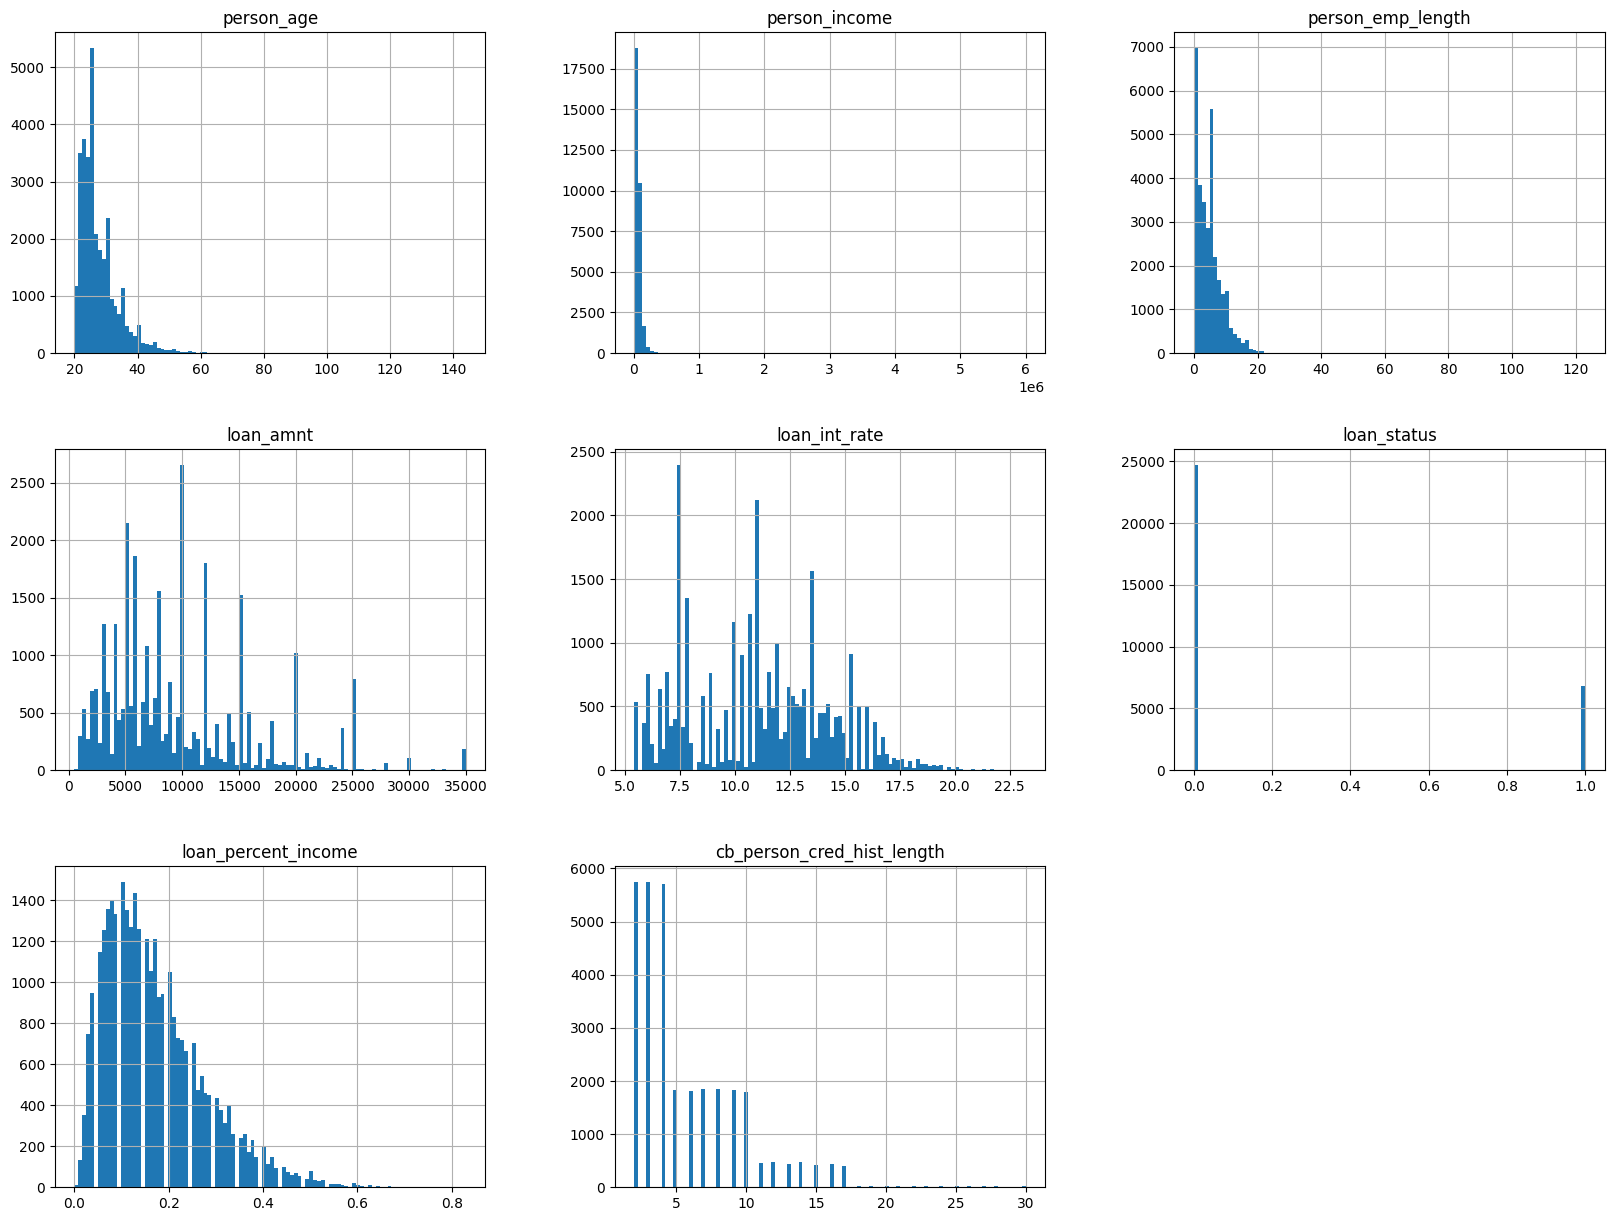

In [13]:
data.hist(bins=100, figsize=(20,15))

### person_age

<Axes: ylabel='person_age'>

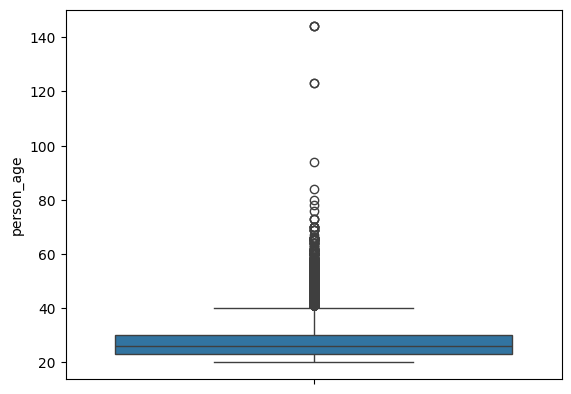

In [14]:
# Pour visualiser les outliers
sns.boxplot(data["person_age"])

Statistiques descriptives :
- La majorité des individus ont entre 20 et 30 ans, avec une moyenne d’âge de 27.73 ans et un écart-type de 6.31.
- Des valeurs aberrantes comme 144 ans (détectée avec describe) pourraient indiquer des erreurs ou anomalies.
- Les quartiles montrent que 75 % des individus ont moins de 30 ans, avec un âge minimum de 20 ans.

Distribution :
- L'histogramme confirme une concentration des valeurs entre 20 et 40 ans.


Stratégie :
  - Au vue de la distribution et de la concentration de l'âge entre 20 et 40 ans. Nous considérons comme valeurs abberrantes les âges supérieur à 80 ans.
  - Donc nous allons supprimer ces valeurs aberrantes (ex. 144 ans) pour améliorer la qualité des données.

In [15]:
data = data[data['person_age'] <= 80]
data['person_age'].describe()

,person_age
count,31522.000000
mean,27.738246
std,6.199611
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,80.000000


### person_income

<Axes: ylabel='person_income'>

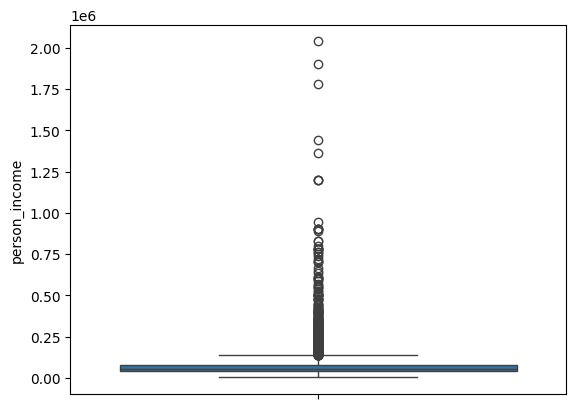

In [16]:
# Pour visualiser les outliers
sns.boxplot(data["person_income"])

Statistiques descriptives :
- Le revenu annuel moyen est de 66,649.37, avec un écart-type élevé de 62,356.45, indiquant une large disparité.
- Les revenus varient de 4,000 à 6,000,000, où les revenues supérieur à 1 million sont en grandes minorités, donc constitue des valeurs aberrantes, mais nous les conservons, car pour nous se ne sont pas des erreurs.
- La majorité des revenus sont concentrés entre 39,480 et 80,000.

Distribution :
- L’histogramme montre une asymétrie à droite : peu de personnes ont des revenus très élevés.

Stratégie :
- Appliquez une transformation pour réduire l'impact des valeurs aberrantes.

<Axes: ylabel='person_income'>

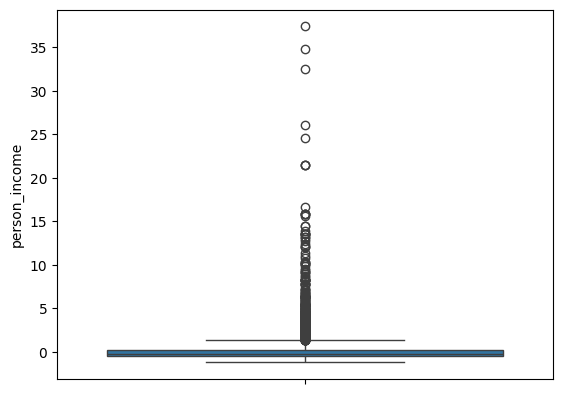

In [17]:
scaler = StandardScaler()
data['person_income'] = scaler.fit_transform(data[['person_income']])
sns.boxplot(data["person_income"])

### person_emp_length

<Axes: ylabel='person_emp_length'>

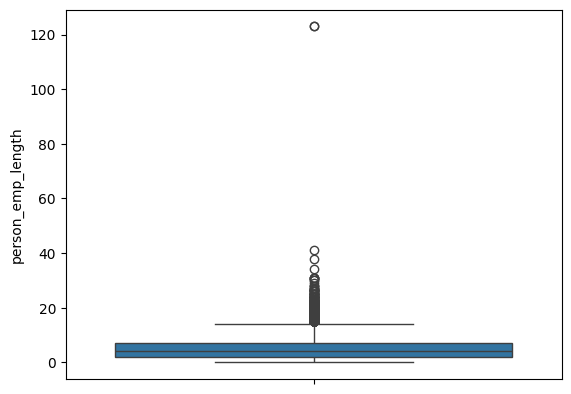

In [18]:
# Pour visualiser les outliers
sns.boxplot(data["person_emp_length"])

Statistiques descriptives :
- La moyenne des années d’expérience est de 4.79 ans, avec une médiane de 4 ans.
- Une valeur maximale de 123 ans (valeur aberrante) a été détectée.
- La majorité des individus ont moins de 7 ans d’expérience.

Distribution :
- L’histogramme montre que la plupart des individus ont une expérience d'environ 0-20 ans.

Stratégie:
- Au vue de la distribution et de la concentration du nombre d'année d'expérience entre 0 et 20 ans. Nous considérons comme valeurs abberrantes les valeurs supérieures à 45 ans.
  - Donc nous allons supprimer ces valeurs aberrantes (ex. 123 nombre d'année) pour améliorer la qualité des données.

In [19]:
data = data[data['person_emp_length'] <= 45]
data['person_emp_length'].describe()

,person_emp_length
count,31520.000000
mean,4.783058
std,4.037384
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,41.000000


### loan_amnt

<Axes: ylabel='loan_amnt'>

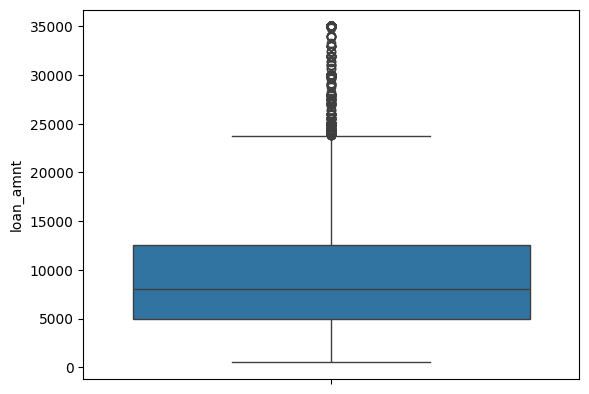

In [20]:
# Pour visualiser les outliers
sns.boxplot(data["loan_amnt"])

Statistiques descriptives :
- Le montant moyen des prêts est de 9,656.49, avec une médiane de 8,000.
- Les prêts varient entre 500 et 35,000, avec peu d'outliers.
75 % des prêts sont inférieurs à 12,500.

Distribution :
- L’histogramme montre une répartition uniforme, avec une concentration autour de 5,000 à 15,000.

Stratégie :
- Les données sont répartie équitablement, mais on pourrait réaliser un scaling.

<Axes: ylabel='loan_amnt'>

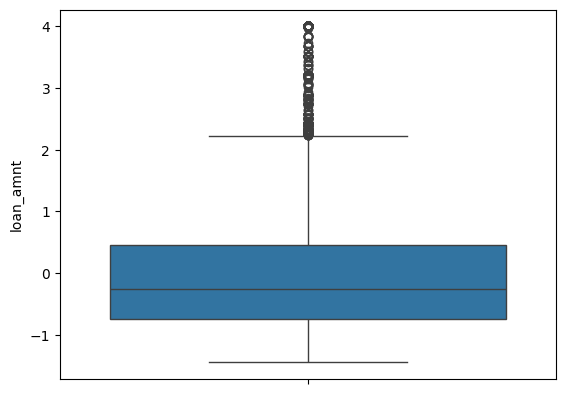

In [21]:
scaler = StandardScaler()
data['loan_amnt'] = scaler.fit_transform(data[['loan_amnt']])
sns.boxplot(data["loan_amnt"])

### loan_int_rate

<Axes: ylabel='loan_int_rate'>

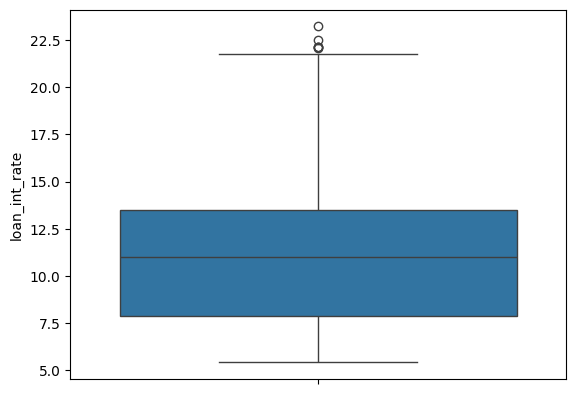

In [22]:
# Pour visualiser les outliers
sns.boxplot(data["loan_int_rate"])

Statistiques descriptives :
- Le taux moyen est de 11.04%, avec une variation (écart-type) de 3.23.
- Les taux vont de 5.42% à 23.22%, ce qui reflète une variation importante des risques.

Distribution :
- L’histogramme montre des pics multiples, ce qui est normal car il y a des segments dans les taux, liés aux catégories loan_grade.

On ne voit pas de valeur aberrantes/outliers

### loan_percent_income

<Axes: ylabel='loan_percent_income'>

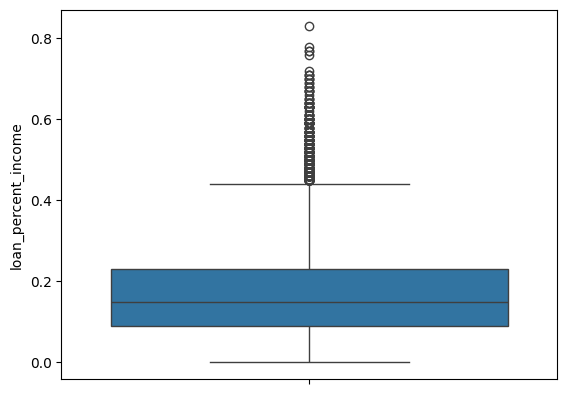

In [23]:
# Pour visualiser les outliers
sns.boxplot(data["loan_percent_income"])

Statistiques descriptives :
- La moyenne est de 0.17 (17 % du revenu), avec des valeurs allant jusqu’à 83 %.
- Les quartiles montrent qu’une majorité des prêts demandent entre 9 % et 23 % du revenu annuel.

Distribution :
- L’histogramme montre une distribution proche d’une loi normale avec un pic autour de 15-20 %.

On ne voit pas de valeur aberrantes/outliers

### cb_person_cred_hist_length

<Axes: ylabel='cb_person_cred_hist_length'>

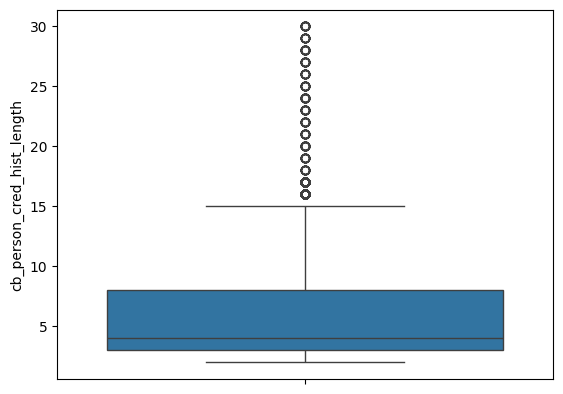

In [24]:
# Pour visualiser les outliers
sns.boxplot(data["cb_person_cred_hist_length"])

Statistiques descriptives :
- La moyenne est de 5.79 ans, avec un écart-type de 4.04.
- La majorité des individus ont un historique de crédit compris entre 2 et 8 ans, avec une médiane de 4 ans.

Distribution :
- L’histogramme montre une majorité de courtes durées d’historique (2-10 ans).

On ne voit pas de valeur aberrantes/outliers

## Non-Numerical : Features values distributions, scaling & outliers

<ipython-input-25-401aff14367f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='muted')


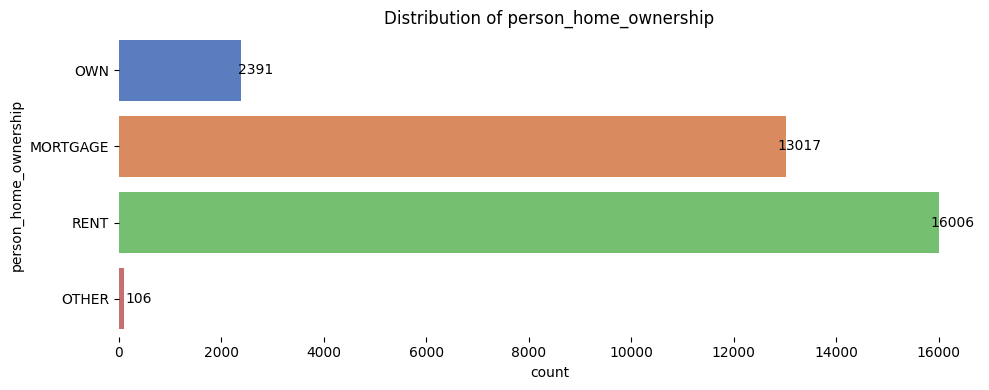

<ipython-input-25-401aff14367f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='muted')


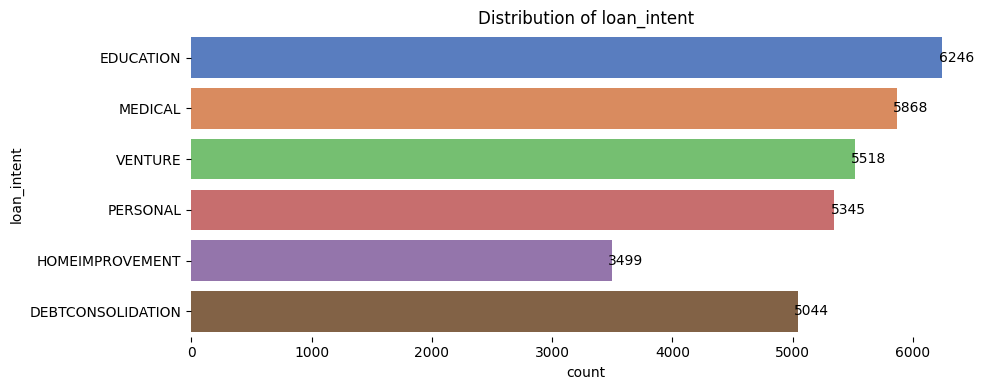

<ipython-input-25-401aff14367f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='muted')


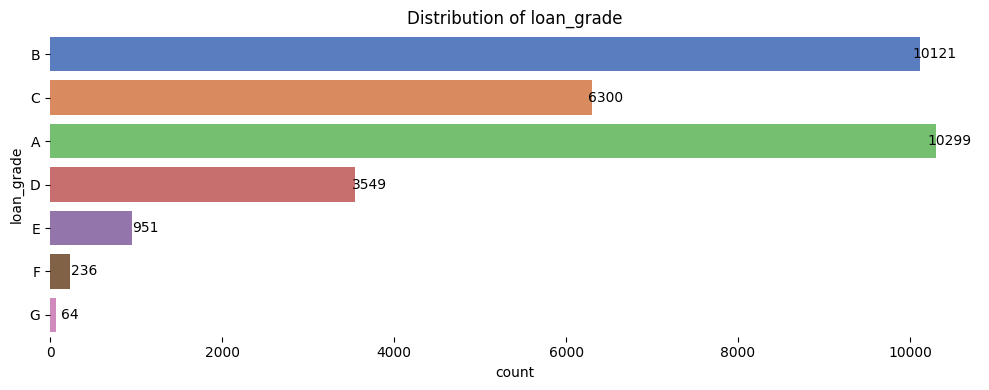

<ipython-input-25-401aff14367f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='muted')


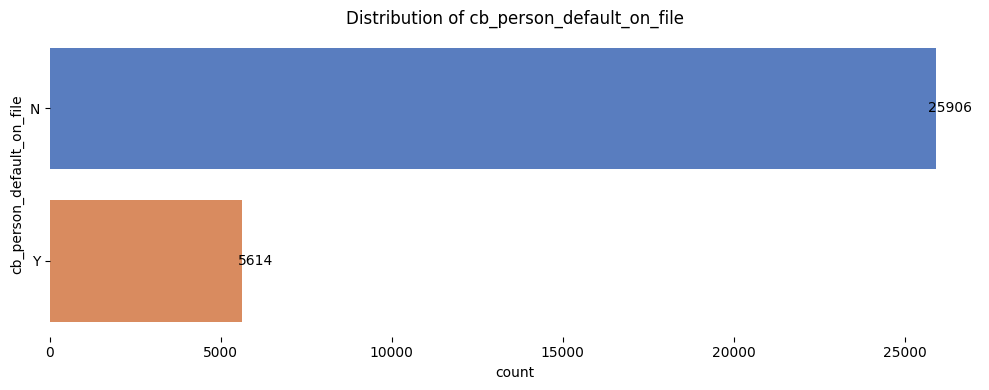

In [25]:
def plot_categorical_distribution(column_name, data=data):
    plt.figure(figsize=(10, 4))

    sns.countplot(y=column_name, data=data, palette='muted')
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()
plot_categorical_distribution('person_home_ownership')
plot_categorical_distribution('loan_intent')
plot_categorical_distribution('loan_grade')
plot_categorical_distribution('cb_person_default_on_file')

## Target feature study

In [26]:
target = data[target_name]
print(target.value_counts())  # Fréquence des classes

loan_status
0    24713
1     6807
Name: count, dtype: int64


Dans notre contexte, accepter un prêt qui aurait dû être refusé (faux positif) est plus grave que de refuser un prêt qui aurait dû être accepté (faux négatif), car un prêt risqué accepté représente un plus grand danger. Ainsi, un modèle favorisant la classe 0 (prêt refusé) est préférable, mais il ne doit pas pour autant sacrifier l'acceptation de bons prêts.

Notre ratio d'équilibre est environ 78 % de prêts refusés (classe 0) et 22 % de prêts acceptés (classe 1).

Une solution pour équilibrer ces données, serait de supprimer aléatoirement des prêts refusés. Le problème que pose cette solution dans notre contexte de projet scolaire est de ne pas pouvoir fournir des données constante entre chaque execution.

La suppression arbitraire des `x` dernières lignes de la classe 0, affecterai certainement notre répartition de donnée, en perdant des valeurs d'une classe de `loan_grade`.

Nous faisons donc le choix de conserver ce déséquilibre, malgré les possibles impacts que cela représente, tel que l'augmentation des faux négatif.

### Encodage

#### OneHotEncoder

In [27]:
data = pd.get_dummies(data, columns=['cb_person_default_on_file', 'loan_intent', 'person_home_ownership'], drop_first=True)
data

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_Y,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
1,21,-1.078676,5.0,B,-1.367648,11.14,0,0.10,2,False,True,False,False,False,False,False,True,False
2,25,-1.078676,1.0,C,-0.657293,12.87,1,0.57,3,False,False,False,True,False,False,False,False,False
3,23,-0.019067,4.0,C,3.999477,15.23,1,0.53,2,False,False,False,True,False,False,False,False,True
4,24,-0.229472,8.0,C,3.999477,14.27,1,0.55,4,True,False,False,True,False,False,False,False,True
5,21,-1.072990,2.0,A,-1.130863,7.14,1,0.25,2,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,-0.256010,1.0,C,-0.609936,13.16,0,0.11,30,False,False,False,False,True,False,False,False,False
32577,54,1.014005,4.0,A,1.256718,7.49,0,0.15,19,False,False,False,False,True,False,False,False,False
32578,65,0.179965,3.0,B,3.999477,10.99,1,0.46,28,False,False,True,False,False,False,False,False,True
32579,56,1.582668,5.0,B,0.842345,11.48,0,0.10,26,False,False,False,False,True,False,False,False,False


#### Valeur ordonnée

In [28]:
map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
data['loan_grade'] = data['loan_grade'].map(map)
data['loan_grade']

,loan_grade
1,1
2,2
3,2
4,2
5,0
...,...
32576,2
32577,0
32578,1
32579,1


## Features correlation, selection

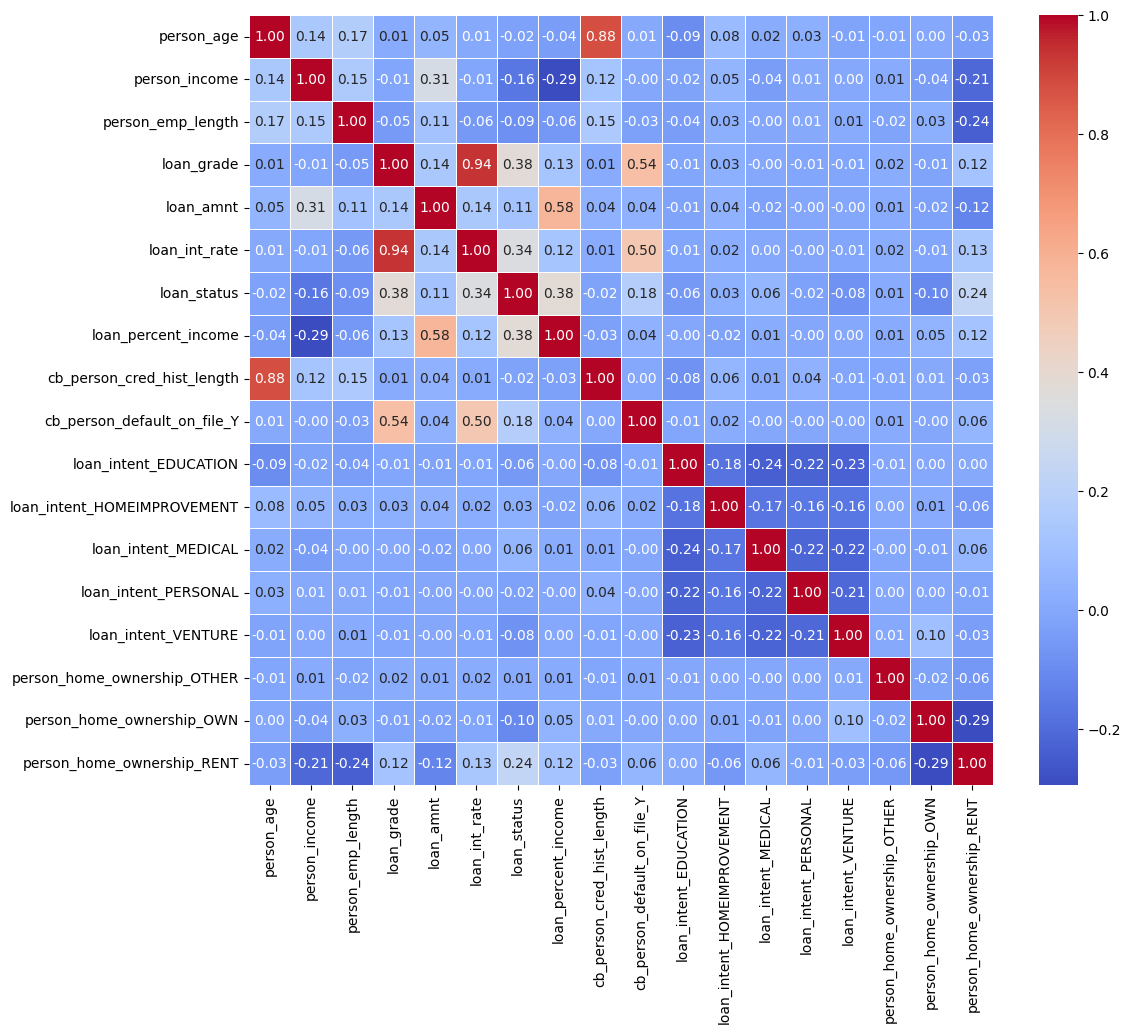

In [29]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))  # Augmenter la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [30]:
correlation_matrix[target_name].sort_values(ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.380086
loan_grade,0.377285
loan_int_rate,0.338316
person_home_ownership_RENT,0.235090
cb_person_default_on_file_Y,0.181286
loan_amnt,0.112592
loan_intent_MEDICAL,0.058187
loan_intent_HOMEIMPROVEMENT,0.034450
person_home_ownership_OTHER,0.013462


- **Corrélations positives fortes** :
  - **loan_percent_income (0.38)** et **loan_grade (0.38)** montrent que les prêts avec un pourcentage de revenu élevé et un meilleur grade sont plus susceptibles d'être acceptés.
  - **loan_int_rate (0.34)** indique qu'un taux d'intérêt plus élevé est légèrement associé à une plus grande probabilité d'acceptation du prêt.

- **Corrélations négatives faibles** :
  - **person_income (-0.16)** et **person_home_ownership_OWN (-0.10)** montrent une légère tendance à ce que les personnes avec un revenu très élevé ou étant propriétaires de leur logement aient moins de chances d'obtenir un prêt.

- **Corrélations faibles ou proches de zéro** :
  - L'**âge** et l'**historique de crédit** n'ont que peu ou pas d'impact sur l'acceptation des prêts.

Les variables les plus influentes sur l'acceptation des prêts sont celles liées au **revenu**, au **grade du prêt** et au **taux d'intérêt**. Les autres facteurs comme l'âge ou la durée de l'emploi semblent avoir un impact négligeable.

In [31]:
# Conservation que des features les plus interessantes
filtered_correlations = correlation_matrix[target_name][
    (correlation_matrix[target_name] < -0.1) | (correlation_matrix[target_name] > 0.1)
]

filtered_correlations

,loan_status
person_income,-0.164871
loan_grade,0.377285
loan_amnt,0.112592
loan_int_rate,0.338316
loan_status,1.000000
loan_percent_income,0.380086
cb_person_default_on_file_Y,0.181286
person_home_ownership_OWN,-0.102024
person_home_ownership_RENT,0.235090


On retrouve donc dans la liste des features, ci-dessus, que nous allons conserver pour nos pipelines. Nous avons décidé de garder uniquement les features dont la corrélation en positif ou négatif est supérieur à 0.1.

Cependant nous trouvons cela étonnant que l'intention du prêt et le nombre d'année de travail impactent peu la décision sur la target. Nous pensions que lors d'un pret bancaire la nature du prêt influençait la décision et que le nombre d'année de travail, pouvais rasssurer les banques sur l'approbation de ce dernier.

## Interpretations, hypotheses and conclusions

Hypothèses :
- Selon nos différentes analyses et choix, le dataset final obtenu permettra de prédire si un prêt sera accordé, selon les 8 features que nous avons conservé.

1. **Gestion des valeurs manquantes**
   - **`person_emp_length`** :  
     - Décision : Suppression des lignes où cette valeur est manquante (895 lignes).  
     - Raison : Ces données manquent probablement en raison de l'absence d'information lors de la collecte. Inventer ces valeurs serait peu fiable, et leur suppression n'impacte pas significativement la taille du dataset.
   - **`loan_int_rate`** :  
     - Décision : Remplacement des valeurs manquantes par la médiane des groupes définis par `loan_grade`.  
     - Raison : Une analyse statistique (ANOVA et corrélation de Spearman) a confirmé une relation forte entre `loan_grade` et `loan_int_rate`. Utiliser la médiane réduit l'impact des valeurs extrêmes tout en préservant la cohérence entre les groupes.

2. **Traitement des doublons**
   - Décision : Suppression des 157 lignes dupliquées.  
   - Raison : Les doublons pourraient biaiser les résultats et conduire à un surapprentissage.

3. **Gestion des valeurs aberrantes**
   - **`person_age`** :  
     - Décision : Suppression des âges supérieurs à 80 ans.  
     - Raison : Des âges anormalement élevés (comme 144 ans) sont considérés comme des erreurs ou anomalies. La concentration des données entre 20 et 40 ans justifie ce seuil.
   - **`person_emp_length`** :  
     - Décision : Suppression des valeurs supérieures à 45 ans.  
     - Raison : Une valeur maximale aberrante de 123 ans a été détectée. La majorité des données se situe entre 0 et 20 ans, ce qui motive la suppression des valeurs extrêmes.  
   - **`person_income`** :  
     - Décision : Application d'une standardisation.  
     - Raison : Bien que les revenus supérieurs à 1 million soient rares, ils ne sont pas considérés comme des erreurs. La standardisation atténue leur impact.  
   - **Autres variables numériques** :  
     - Décision : Aucun traitement des outliers pour `loan_amnt`, `loan_int_rate`, `loan_percent_income`, et `cb_person_cred_hist_length`.  
     - Raison : Ces variables ne présentent pas de valeurs aberrantes évidentes selon l'analyse descriptive et visuelle.

4. **Standardisation des données numériques**
   - Décision : Standardisation des variables `person_income` et `loan_amnt`.  
   - Raison : Réduction des disparités de magnitudes entre les variables afin de faciliter l'apprentissage des modèles.

5. **Analyse des variables catégoriques**
   - Décision : Analyse et visualisation de la distribution des variables catégoriques (`person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file`.).  
   - Raison : Comprendre leur répartition pour détecter d'éventuels déséquilibres qui pourraient influencer les performances des modèles.

# ML Baseline & Ensemble Models

In [32]:
X = data.drop(target_name, axis=1)
y = data[target_name]


--- Logistic Regression ---

- train -
Mean ROC AUC (CV): 0.864 ± 0.012
Mean Precision (CV): 0.743
Mean Recall (CV): 0.497
Mean F1-Score (CV): 0.595

- test -
ROC AUC (test): 0.867
Precision (test): 0.739
Recall (test): 0.498
F1-Score (test): 0.595

--- Balanced Logistic Regression ---

- train -
Mean ROC AUC (CV): 0.864 ± 0.012
Mean Precision (CV): 0.510
Mean Recall (CV): 0.783
Mean F1-Score (CV): 0.617

- test -
ROC AUC (test): 0.868
Precision (test): 0.518
Recall (test): 0.784
F1-Score (test): 0.624

--- Random Forest ---

- train -
Mean ROC AUC (CV): 0.930 ± 0.009
Mean Precision (CV): 0.963
Mean Recall (CV): 0.720
Mean F1-Score (CV): 0.824

- test -
ROC AUC (test): 0.934
Precision (test): 0.968
Recall (test): 0.733
F1-Score (test): 0.834

--- Balanced Random Forest ---

- train -
Mean ROC AUC (CV): 0.930 ± 0.010
Mean Precision (CV): 0.970
Mean Recall (CV): 0.714
Mean F1-Score (CV): 0.822

- test -
ROC AUC (test): 0.936
Precision (test): 0.976
Recall (test): 0.727
F1-Score (test): 

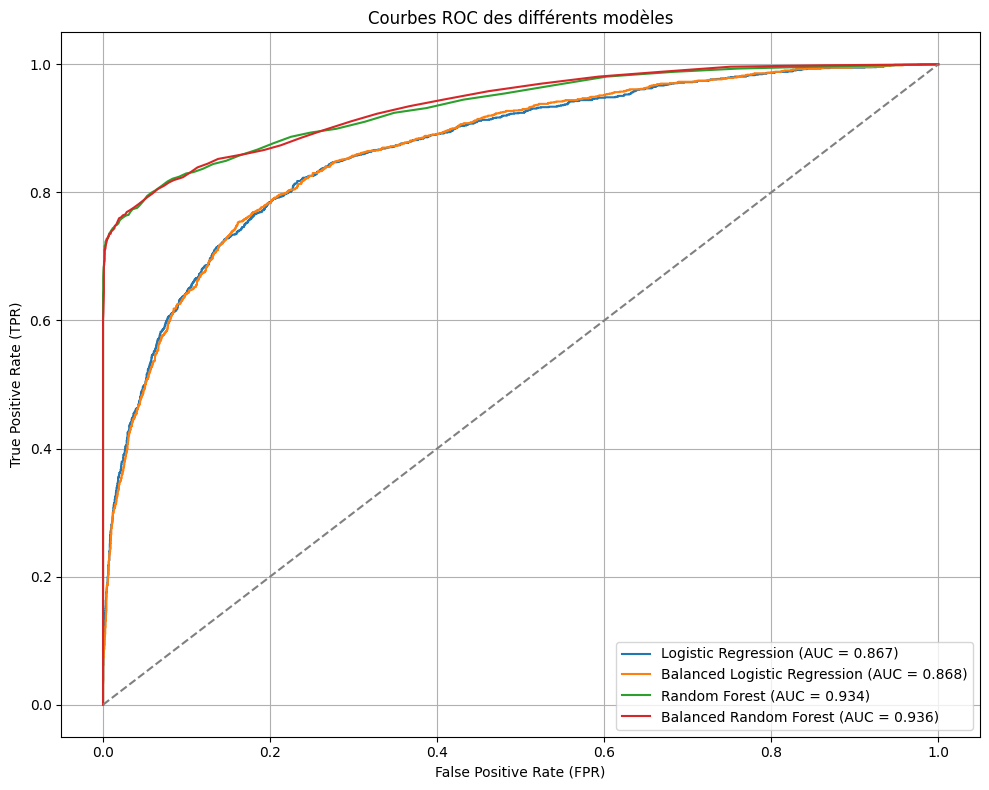

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialisation des modèles

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Balanced Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Balanced Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
}

# Scorers pour cross_validate
scorers = {
    "roc_auc": "roc_auc",
    "precision": make_scorer(precision_score, average='binary'),
    "recall": make_scorer(recall_score, average='binary'),
    "f1": make_scorer(f1_score, average='binary')
}

# Validation croisée avec cross_validate
results = {}
roc_data = {}  # Stockage des données nécessaires au tracé des courbes ROC

for name, model in models.items():
    # Validation croisée pour les métriques
    scores = cross_validate(
        model, X_train, y_train, cv=10, scoring=scorers, return_train_score=False
    )
    results[name] = {
        "roc_auc_mean": np.mean(scores["test_roc_auc"]),
        "roc_auc_std": np.std(scores["test_roc_auc"]),
        "precision_mean": np.mean(scores["test_precision"]),
        "recall_mean": np.mean(scores["test_recall"]),
        "f1_mean": np.mean(scores["test_f1"]),
    }
    print(f"\n--- {name} ---")
    print(f"\n- train -")
    print(f"Mean ROC AUC (CV): {results[name]['roc_auc_mean']:.3f} ± {results[name]['roc_auc_std']:.3f}")
    print(f"Mean Precision (CV): {results[name]['precision_mean']:.3f}")
    print(f"Mean Recall (CV): {results[name]['recall_mean']:.3f}")
    print(f"Mean F1-Score (CV): {results[name]['f1_mean']:.3f}")

    # Entraînement du modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    # Prédiction des probabilités pour le jeu de test
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # Calcul des métriques pour l'ensemble de test
    roc_auc_test = roc_auc_score(y_test, y_probs)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)

    print(f"\n- test -")
    print(f"ROC AUC (test): {roc_auc_test:.3f}")
    print(f"Precision (test): {precision_test:.3f}")
    print(f"Recall (test): {recall_test:.3f}")
    print(f"F1-Score (test): {f1_test:.3f}")

    # Calcul des points pour la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {"fpr": fpr, "tpr": tpr, "roc_auc": roc_auc}

# Tracé des courbes ROC sur un même graphique
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data["fpr"], data["tpr"], label=f"{name} (AUC = {data['roc_auc']:.3f})")

# Ligne de référence (modèle aléatoire)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

# Configuration du graphique
plt.title("Courbes ROC des différents modèles")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()

# Affichage du graphique
plt.show()


## Discussion

Pour analyser la performance de nos modèles, nous nous sommes appuyés sur des métriques standard telles que l'AUC-ROC, la précision (precision), le rappel (recall) et le F1-score. Ces indicateurs permettent de mieux comprendre le compromis entre les prédictions correctes et les erreurs, notamment dans le contexte d'un dataset déséquilibré.

Pour rappel :
- **AUC-ROC** : Mesure la capacité d'un modèle à discriminer entre classes, en traçant la courbe des taux de vrais positifs (TPR) contre les faux positifs (FPR).  
- **Précision (precision)** : Proportion des prédictions positives correctes parmi toutes les prédictions positives.  
- **Rappel (recall)** : Proportion des vrais positifs détectés parmi toutes les instances positives.  
- **F1-score** : Moyenne harmonique entre précision et rappel, équilibrant les deux métriques.  

### Logistic Regression

La régression logistique classique a servi de modèle de base. Avec un AUC-ROC moyen de 0.867 sur le jeu de test, cette méthode démontre une capacité correcte à distinguer les classes positives et négatives. Cependant, la faiblesse réside toujours dans le rappel (0.498), indiquant que près de la moitié des cas positifs n'ont pas été détectés. Ce problème est visible sur la courbe ROC, où ce modèle est constamment surpassé par les autres, particulièrement pour les faibles valeurs de FPR.

En pondérant les classes via l'option class_weight='balanced', nous avons observé une légère amélioration du rappel (0.784) sur le jeu de test, mais au détriment de la précision (0.518). Le F1-score passe à 0.624, ce qui illustre une meilleure prise en compte des classes minoritaires, bien que les faux positifs soient nettement plus nombreux.

### Random Forest

Le Random Forest Classifier s'est révélé bien plus performant que la régression logistique. Avec un AUC-ROC moyen de 0.934 sur le jeu de test, le modèle capture davantage de nuances dans les données, comme le montre la courbe ROC plus proche du coin supérieur gauche. La précision de 0.968 et un rappel de 0.733 traduisent un excellent équilibre entre les classes, tout en minimisant les faux positifs. Ce modèle atteint un F1-score de 0.834.

En introduisant une pondération pour les classes (class_weight='balanced'), les résultats restent presque identiques (AUC-ROC moyen de 0.936, précision de 0.976 et rappel de 0.727). Cela montre que le modèle gère naturellement bien le déséquilibre des données, rendant la pondération négligeable.

### Analyse Comparative

En comparant les modèles, il est évident que le Random Forest, avec ou sans pondération, surpasse les autres approches. Avec un AUC-ROC moyen de 0.934 et un F1-score de 0.834 sur le jeu de test, il montre une excellente capacité à capturer les relations complexes entre les variables, tout en maintenant un bon équilibre entre précision (0.968) et rappel (0.733). La régression logistique, en revanche, est pénalisée par sa nature linéaire, incapable de capturer ces relations complexes. Bien que la version pondérée de la régression logistique améliore la gestion des classes minoritaires, avec un rappel de 0.784 et un F1-score de 0.624, elle n'atteint pas la performance globale du Random Forest.

### Conclusion

Pour notre problématique, où les faux positifs doivent être minimisés tout en détectant un maximum de prêts accordés, le Random Forest s'avère être le choix optimal. Avec une précision de 0.968 et un rappel de 0.733 sur le jeu de test, ce modèle parvient à maintenir un faible taux de faux positifs tout en réduisant les faux négatifs, ce qui est essentiel pour détecter efficacement les prêts accordés. Sa performance globale, avec un AUC-ROC de 0.934 et un F1-score de 0.834, en fait une solution fiable.



# Enhanced Models, Hyperparameter Tuning & Analysis

Dans cette section, nous visons à améliorer les performances de nos modèles de classification à l'aide de techniques avancées telles que l'utilisation de nouveaux algorithmes (e.g., Gradient Boosting, XGBoost) et l'optimisation des hyperparamètres (Grid Search, Random Search). Nous analyserons ensuite les résultats obtenus pour justifier nos choix.

## Modèles améliorés (Enhanced Models)

### Ajout de nouveaux modèles

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modèles à tester
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
}

# Scorers pour cross_validate
scorers = {
    "roc_auc": "roc_auc",
    "precision": make_scorer(precision_score, average='binary'),
    "recall": make_scorer(recall_score, average='binary'),
    "f1": make_scorer(f1_score, average='binary')
}

# Résultats et données ROC
results = {}
roc_data = {}  # Stockage des données pour les courbes ROC

for name, model in models.items():
    # Validation croisée pour les métriques
    scores = cross_validate(
        model, X_train, y_train, cv=10, scoring=scorers, return_train_score=False
    )
    results[name] = {
        "roc_auc_mean": np.mean(scores["test_roc_auc"]),
        "roc_auc_std": np.std(scores["test_roc_auc"]),
        "precision_mean": np.mean(scores["test_precision"]),
        "recall_mean": np.mean(scores["test_recall"]),
        "f1_mean": np.mean(scores["test_f1"]),
    }
    print(f"\n--- {name} ---")
    print(f"Mean ROC AUC (CV): {results[name]['roc_auc_mean']:.3f} ± {results[name]['roc_auc_std']:.3f}")
    print(f"Mean Precision (CV): {results[name]['precision_mean']:.3f}")
    print(f"Mean Recall (CV): {results[name]['recall_mean']:.3f}")
    print(f"Mean F1-Score (CV): {results[name]['f1_mean']:.3f}")

    # Entraînement sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    # Prédiction des probabilités et des classes pour le jeu de test
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # Calcul des métriques sur l'ensemble de test
    roc_auc_test = roc_auc_score(y_test, y_probs)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)

    print(f"\n- Test Metrics -")
    print(f"ROC AUC (test): {roc_auc_test:.3f}")
    print(f"Precision (test): {precision_test:.3f}")
    print(f"Recall (test): {recall_test:.3f}")
    print(f"F1-Score (test): {f1_test:.3f}")

    # Calcul des points pour la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {"fpr": fpr, "tpr": tpr, "roc_auc": roc_auc}

# Tracé des courbes ROC pour les modèles
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data["fpr"], data["tpr"], label=f"{name} (AUC = {data['roc_auc']:.3f})")

# Ligne de référence (modèle aléatoire)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

# Configuration du graphique
plt.title("Courbes ROC des modèles")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()

# Affichage du graphique
plt.show()


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



--- Gradient Boosting ---
Mean ROC AUC (CV): 0.927 ± 0.010
Mean Precision (CV): 0.933
Mean Recall (CV): 0.706
Mean F1-Score (CV): 0.804

- Test Metrics -
ROC AUC (test): 0.935
Precision (test): 0.929
Recall (test): 0.716
F1-Score (test): 0.809


AttributeError: 'super' object has no attribute '__sklearn_tags__'

### Comparaison des modèles initiaux vs. améliorés

## Optimisation des hyperparamètres (Hyperparameter Tuning)


### Explication des techniques utilisées

### Processus